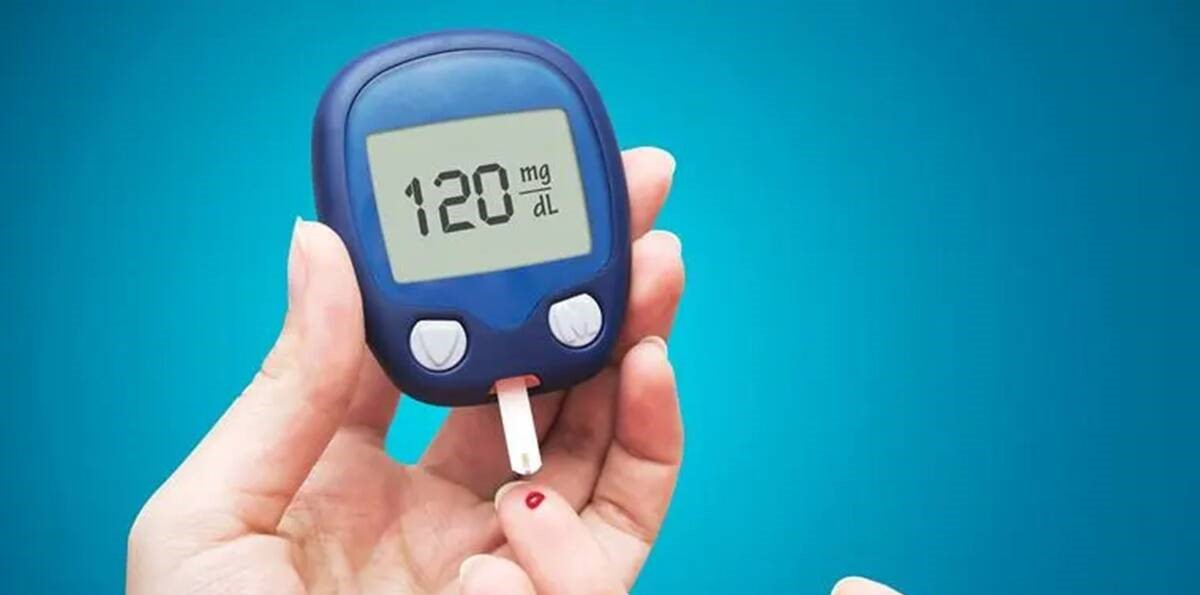

# Import Libraries and assign data

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Pima Indians Diabetes Database 

In [23]:
data = pd.read_csv('diabetes.csv')

# Observe Data

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preprocessing

**Checking Null Values**

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

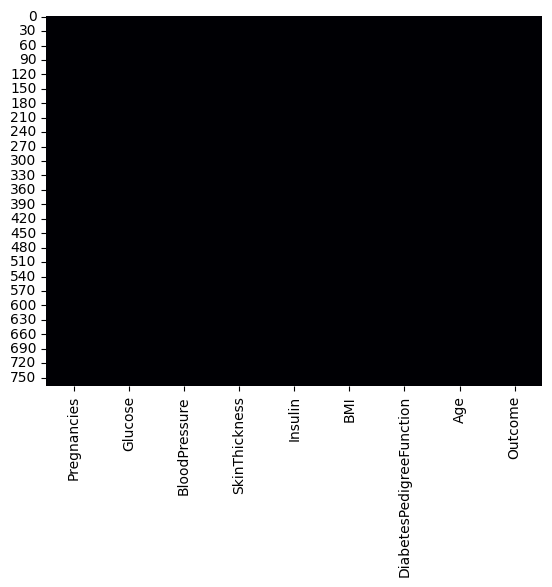

In [27]:
sns.heatmap(data.isnull(),cbar = False, cmap = 'magma')
data.isnull().sum()

**It doubt that null values have been replaced with 0. Let's See.**

In [28]:
error = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction']
data[error].isin([0]).sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
dtype: int64

**Our doubt was right. Now let's replace 0's with NaN value so that we can impute it later. Also we will check our main data is updated with null values or not.**

In [29]:
data[error] = data[error].replace(0, np.NaN)
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Let's Impute our null values and fill it with mean**

In [30]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.NaN, strategy="mean")
data[error] = si.fit_transform(data[error])

**Checking null values fixed or not**

In [31]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Now lets check whether our data is balanced or imbalenced**

Outcome
0    500
1    268
Name: count, dtype: int64

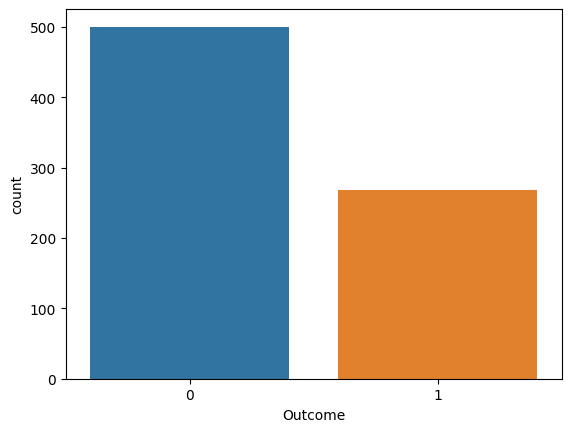

In [32]:
sns.countplot(x = data['Outcome'])
data['Outcome'].value_counts()

**Imablance affirmed. Let's fix it.**

In [33]:
# We will be using upsampling technique
from sklearn.utils import resample
data_major = data[(data['Outcome']==0)]
data_minor = data[(data['Outcome']==1)]
upsample = resample(data_minor,
                    replace = True,
                    n_samples = 500,
                    random_state= 42)
df = pd.concat([upsample, data_major])

**Let's check it is fixed or not**

Outcome
1    500
0    500
Name: count, dtype: int64

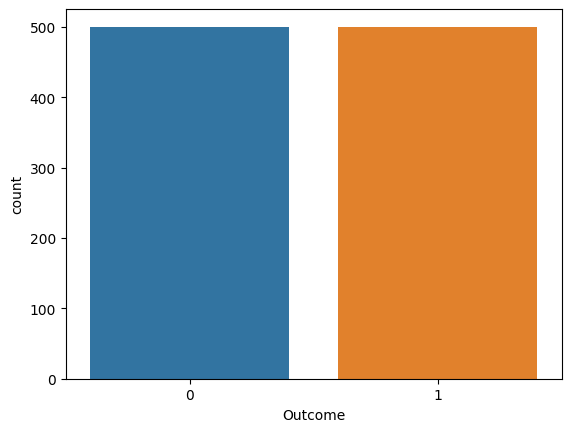

In [34]:
sns.countplot(x = df['Outcome'])
df['Outcome'].value_counts()

**Now our Data is Balanced. Let's Check Co-relation**

<Axes: >

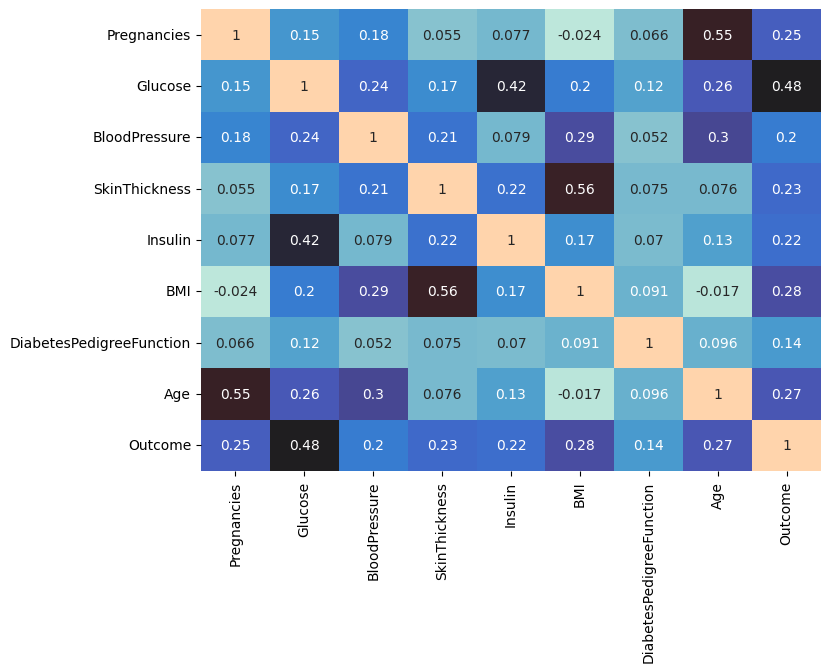

In [35]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr,annot = True,cbar = False, cmap = 'icefire')

# Split the data

In [36]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 8), (300, 8), (700,), (300,))

# Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Random Forest and Result

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       147
           1       0.83      0.92      0.87       153

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300

[[119  28]
 [ 13 140]]


Accuracy Score =  0.86


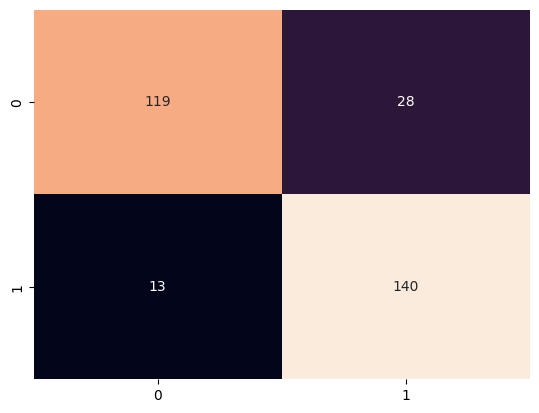

In [42]:
cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)
print('Accuracy Score = ',round(accuracy_score(y_test,pred_rf),2))